# NLP Sentiment Analysis

### Business Objective:

- Extracting sentiment from customer reviews on a product
- Data Set Details:

The dataset should be scraped/extracted form ecommerce websites like amazon etc. 

Preferably amazon and focus only on extracting customer reviews, rest are not required


## Data Collection

* Product : Apple 2020 MacBook Air Laptop M1 chip, 13.3-inch
* E-commerse website : www.amazon.in

MacBook Air was the first product in Mac series launched with the M1 chip produced by Apple itself, which replaced the Intel Prossesors in Apple products. 
Apple integrated the CPU, GPU, Neural Engine, I/O and so much more onto a single tiny chip. M1 delivers exceptional performance, custom technologies and unbelievable power efficiency. Introduction of M1 chip was considered as a major breakthrough for Mac.

This gives a relevence in analyzing the customer reviews about the new product from a e-commerse website.

Link : https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews

### Data collection by web-scrapping

Data is collected from an online web-srapper app

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading Dataset
scrap=pd.read_excel("C:\\Users\\avina\\Documents\\Data Science\\Projects\\P-212-NLP Sentiment Analysis\\macbook m1.xlsx")
scrap

,Asin,Title,Content,Verified Purchase,Model,Rating,Helpful,Images,Images URL,Videos,Videos URL,Reviews URL,Author,Avatar URL,Author Homepage,Nation,Date
0,B08N5W4NNB,Value for your buck,Most value for money laptop right now ... amaz...,Y,Colour: Space GreySize: 256 GB,5.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R1CT...,gour,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-18
1,B08N5W4NNB,The best laptop for Business,The best laptop 💻 for Office and professional ...,N,Colour: Space GreySize: 256 GB,5.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R3CS...,Murlimohan Bura,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-18
2,B08N5T6CZ6,When you spend too much money advertising rath...,Looks and worked great for the 1st year. But j...,N,Colour: SilverSize: 256 GB,1.0,0.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/RB1M...,Arnab,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-15
3,B08N5W4NNB,Value for Money Product,NaN,Y,Colour: Space GreySize: 256 GB,5.0,1.0,2,https://m.media-amazon.com/images/I/71Sd3tCZAS...,0,NaN,https://www.amazon.in/gp/customer-reviews/R1YP...,Labhansh Satpute,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-13
4,B08N5T6CZ6,Nice,Nice,Y,Colour: SilverSize: 256 GB,5.0,1.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/RZV5...,LEENUS,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2023-03-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,B08N5XSG8Z,Eureka!,Excellent machine 👌🏻💻. Only ram is of DDR3 ty...,N,Colour: GoldSize: 256 GB,5.0,9.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R345...,Babasaheb,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2020-12-03
752,B08N5T6CZ6,the world’s fastest CPU core in low-power silicon,M1 has the fastest CPU have ever made.The long...,N,Colour: SilverSize: 256 GB,5.0,11.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R2GP...,Rohan singh,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2020-11-26
753,B08N5T6CZ6,Super excited,If we could get it for around 70-75k with some...,N,Colour: SilverSize: 256 GB,5.0,540.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R63L...,Shiran Lone,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2020-11-19
754,B08N5W4NNB,4k display!!,Really awesome and it has a 4k display which w...,N,Colour: Space GreySize: 256 GB,5.0,13.0,0,NaN,0,NaN,https://www.amazon.in/gp/customer-reviews/R3IT...,Mehar,https://images-eu.ssl-images-amazon.com/images...,https://www.amazon.in/gp/profile/amzn1.account...,India 🇮🇳,2020-11-18


In [3]:
# Creating a df containing only review content
review_0=pd.DataFrame(scrap[('Content')])
review_0

,Content
0,Most value for money laptop right now ... amaz...
1,The best laptop 💻 for Office and professional ...
2,Looks and worked great for the 1st year. But j...
3,NaN
4,Nice
...,...
751,Excellent machine 👌🏻💻. Only ram is of DDR3 ty...
752,M1 has the fastest CPU have ever made.The long...
753,If we could get it for around 70-75k with some...
754,Really awesome and it has a 4k display which w...


In [4]:
# Finding number of duplicated reviews
review_0.duplicated().sum()

42

In [5]:
# Deleting the dupllicated reviews
review_1=review_0.drop_duplicates()
review_1[review_1.duplicated()]

,Content


In [6]:
# Finding the null rows
review_1.isnull().sum()

Content    1
dtype: int64

In [7]:
# Deleting the null rows
review_2=review_1.dropna(axis=0)
review_2.isnull().sum()

Content    0
dtype: int64

In [8]:
review_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 713 entries, 0 to 755
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  713 non-null    object
dtypes: object(1)
memory usage: 11.1+ KB


In [9]:
review_2.describe()

,Content
count,713
unique,713
top,Most value for money laptop right now ... amaz...
freq,1


In [10]:
# setting the dataframe as 'final'
review=review_2
review

,Content
0,Most value for money laptop right now ... amaz...
1,The best laptop 💻 for Office and professional ...
2,Looks and worked great for the 1st year. But j...
4,Nice
5,Don’t understand why many applications get han...
...,...
751,Excellent machine 👌🏻💻. Only ram is of DDR3 ty...
752,M1 has the fastest CPU have ever made.The long...
753,If we could get it for around 70-75k with some...
754,Really awesome and it has a 4k display which w...


In [11]:
# Removing emojis from reviews
import re

# Define the emoji pattern
emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001F9D0-\U0001F9DF"
                           "]+", flags=re.UNICODE)

In [12]:
# Remove emojis from the 'Content' column
review['Content'] = review['Content'].apply(lambda x: emoji_pattern.sub(r'', x))
review

,Content
0,Most value for money laptop right now ... amaz...
1,The best laptop for Office and professional w...
2,Looks and worked great for the 1st year. But j...
4,Nice
5,Don’t understand why many applications get han...
...,...
751,Excellent machine . Only ram is of DDR3 type....
752,M1 has the fastest CPU have ever made.The long...
753,If we could get it for around 70-75k with some...
754,Really awesome and it has a 4k display which w...


In [13]:
# Converting to lower case
review['Content'] = review['Content'].str.lower()
review

,Content
0,most value for money laptop right now ... amaz...
1,the best laptop for office and professional w...
2,looks and worked great for the 1st year. but j...
4,nice
5,don’t understand why many applications get han...
...,...
751,excellent machine . only ram is of ddr3 type....
752,m1 has the fastest cpu have ever made.the long...
753,if we could get it for around 70-75k with some...
754,really awesome and it has a 4k display which w...


In [14]:
!pip install textblob
!pip install wordcloud

     -------------------------------------- 636.8/636.8 kB 4.0 MB/s eta 0:00:00
     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00


In [15]:
#NLTK libraries

import nltk
import re
import string
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer

#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from textblob import TextBlob
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot
%matplotlib inline

In [16]:
# Creating sentiment column

def get_sentiment_label(text):
    sentiment = TextBlob(text).sentiment.polarity
    if sentiment > 0:
        return 'Positive'
    elif sentiment < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [17]:
review['Sentiment'] = review['Content'].apply(get_sentiment_label)
review

,Content,Sentiment
0,most value for money laptop right now ... amaz...,Positive
1,the best laptop for office and professional w...,Positive
2,looks and worked great for the 1st year. but j...,Positive
4,nice,Positive
5,don’t understand why many applications get han...,Negative
...,...,...
751,excellent machine . only ram is of ddr3 type....,Positive
752,m1 has the fastest cpu have ever made.the long...,Positive
753,if we could get it for around 70-75k with some...,Positive
754,really awesome and it has a 4k display which w...,Positive


In [18]:
counts=review['Sentiment'].value_counts()
counts

Positive    577
Negative     70
Neutral      66
Name: Sentiment, dtype: int64

### Creating word cloud for all reviews

In [19]:
# Joining the list into one string/text
review_j=' '.join(review['Content'])
review_j

'most value for money laptop right now ... amazing performance, got a good deal, for around 66k.... the best laptop  for office and professional work.touch, screen, clarity, sound, performance all are outstanding.thanks apple  looks and worked great for the 1st year. but just after 1yr 3months one day it suddenly stoped working. took it to the service center said the logic board is not working and would cost rs42000 to replace the logic board. no way of fixing it. also the ssd in integrated into the logic board so all of the data would also be lost.after spending almost a lac to buy the product and in just about a years time if the logic board stops working with no fault of the user, you cannot expect the customer to bear the cost for inadequate product & testing. and you dont get any parts outside.i am now horrified to buy any apple product ever. shifting to windows/android nice don’t understand why many applications get hanged and i have to force quit them. disappointing experience. 

In [20]:
review_nop=review_j.translate(str.maketrans('','', string.punctuation))
review_nop

'most value for money laptop right now  amazing performance got a good deal for around 66k the best laptop  for office and professional worktouch screen clarity sound performance all are outstandingthanks apple  looks and worked great for the 1st year but just after 1yr 3months one day it suddenly stoped working took it to the service center said the logic board is not working and would cost rs42000 to replace the logic board no way of fixing it also the ssd in integrated into the logic board so all of the data would also be lostafter spending almost a lac to buy the product and in just about a years time if the logic board stops working with no fault of the user you cannot expect the customer to bear the cost for inadequate product  testing and you dont get any parts outsidei am now horrified to buy any apple product ever shifting to windowsandroid nice don’t understand why many applications get hanged and i have to force quit them disappointing experience never expected that from app

In [21]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize
review_token=word_tokenize(review_nop)
review_token

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


['most',
 'value',
 'for',
 'money',
 'laptop',
 'right',
 'now',
 'amazing',
 'performance',
 'got',
 'a',
 'good',
 'deal',
 'for',
 'around',
 '66k',
 'the',
 'best',
 'laptop',
 'for',
 'office',
 'and',
 'professional',
 'worktouch',
 'screen',
 'clarity',
 'sound',
 'performance',
 'all',
 'are',
 'outstandingthanks',
 'apple',
 'looks',
 'and',
 'worked',
 'great',
 'for',
 'the',
 '1st',
 'year',
 'but',
 'just',
 'after',
 '1yr',
 '3months',
 'one',
 'day',
 'it',
 'suddenly',
 'stoped',
 'working',
 'took',
 'it',
 'to',
 'the',
 'service',
 'center',
 'said',
 'the',
 'logic',
 'board',
 'is',
 'not',
 'working',
 'and',
 'would',
 'cost',
 'rs42000',
 'to',
 'replace',
 'the',
 'logic',
 'board',
 'no',
 'way',
 'of',
 'fixing',
 'it',
 'also',
 'the',
 'ssd',
 'in',
 'integrated',
 'into',
 'the',
 'logic',
 'board',
 'so',
 'all',
 'of',
 'the',
 'data',
 'would',
 'also',
 'be',
 'lostafter',
 'spending',
 'almost',
 'a',
 'lac',
 'to',
 'buy',
 'the',
 'product',
 'and'

In [22]:
!pip install stopwords

In [23]:
# Removing stopwords
nltk.download('stopwords')
import nltk
from nltk.corpus import stopwords
stop=stopwords.words('english')
review_nosw=[word for word in review_token if not word in stop]
review_nosw

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\avina\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


['value',
 'money',
 'laptop',
 'right',
 'amazing',
 'performance',
 'got',
 'good',
 'deal',
 'around',
 '66k',
 'best',
 'laptop',
 'office',
 'professional',
 'worktouch',
 'screen',
 'clarity',
 'sound',
 'performance',
 'outstandingthanks',
 'apple',
 'looks',
 'worked',
 'great',
 '1st',
 'year',
 '1yr',
 '3months',
 'one',
 'day',
 'suddenly',
 'stoped',
 'working',
 'took',
 'service',
 'center',
 'said',
 'logic',
 'board',
 'working',
 'would',
 'cost',
 'rs42000',
 'replace',
 'logic',
 'board',
 'way',
 'fixing',
 'also',
 'ssd',
 'integrated',
 'logic',
 'board',
 'data',
 'would',
 'also',
 'lostafter',
 'spending',
 'almost',
 'lac',
 'buy',
 'product',
 'years',
 'time',
 'logic',
 'board',
 'stops',
 'working',
 'fault',
 'user',
 'expect',
 'customer',
 'bear',
 'cost',
 'inadequate',
 'product',
 'testing',
 'dont',
 'get',
 'parts',
 'outsidei',
 'horrified',
 'buy',
 'apple',
 'product',
 'ever',
 'shifting',
 'windowsandroid',
 'nice',
 '’',
 'understand',
 'many

In [24]:
df_rev=pd.DataFrame({'rev':review_nosw})
df_rev

,rev
0,value
1,money
2,laptop
3,right
4,amazing
...,...
15994,fast
15995,faster
15996,intel
15997,processor


In [25]:
# concatenate the preprocessed text into a single string
review_w=' '.join(df_rev['rev'])

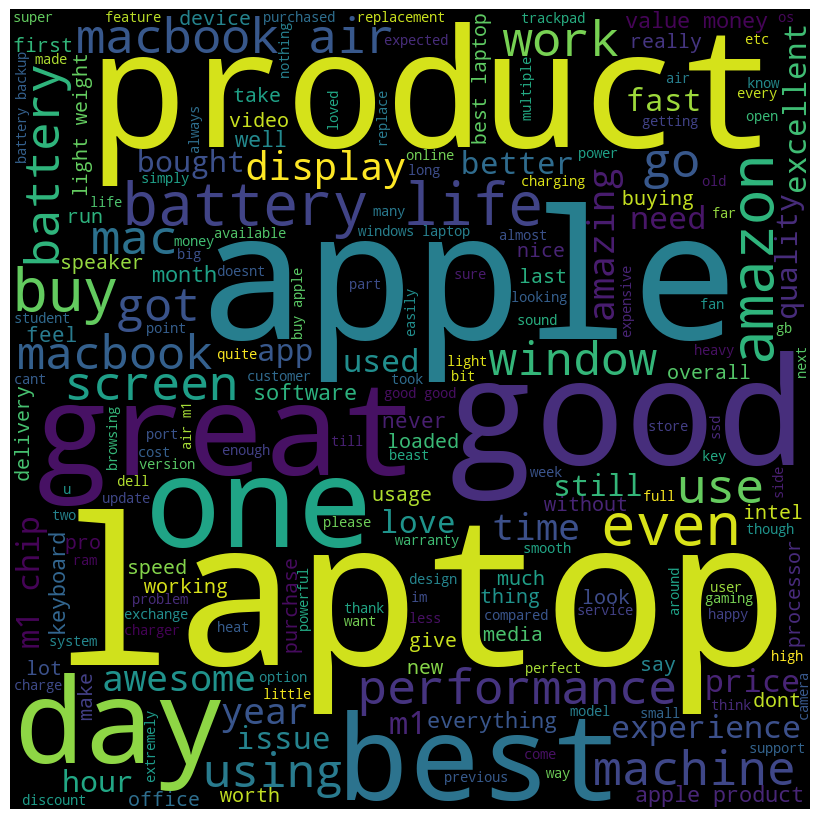

In [26]:
# create the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(review_w)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Creating word cloud for positive reviews

In [27]:
positive=review[review['Sentiment']=='Positive']
positive

,Content,Sentiment
0,most value for money laptop right now ... amaz...,Positive
1,the best laptop for office and professional w...,Positive
2,looks and worked great for the 1st year. but j...,Positive
4,nice,Positive
6,this is my first macbook. and i love using it....,Positive
...,...,...
751,excellent machine . only ram is of ddr3 type....,Positive
752,m1 has the fastest cpu have ever made.the long...,Positive
753,if we could get it for around 70-75k with some...,Positive
754,really awesome and it has a 4k display which w...,Positive


In [28]:
# Joining the list into one string/text
positive_j=''.join(positive['Content'])

In [29]:
# Removing Punctuation
positive_nop=positive_j.translate(str.maketrans('','',string.punctuation))

In [30]:
# Tokanization
positive_token=word_tokenize(positive_nop)

In [31]:
# Removing stopwords
positive_nosw=[word for word in positive_token if not word in stop]

In [32]:
df_pos=pd.DataFrame({'rev':positive_nosw})
df_pos

,rev
0,value
1,money
2,laptop
3,right
4,amazing
...,...
13744,fast
13745,faster
13746,intel
13747,processor


In [33]:
# concatenate the preprocessed text into a single string
positive_w=' '.join(df_pos['rev'])

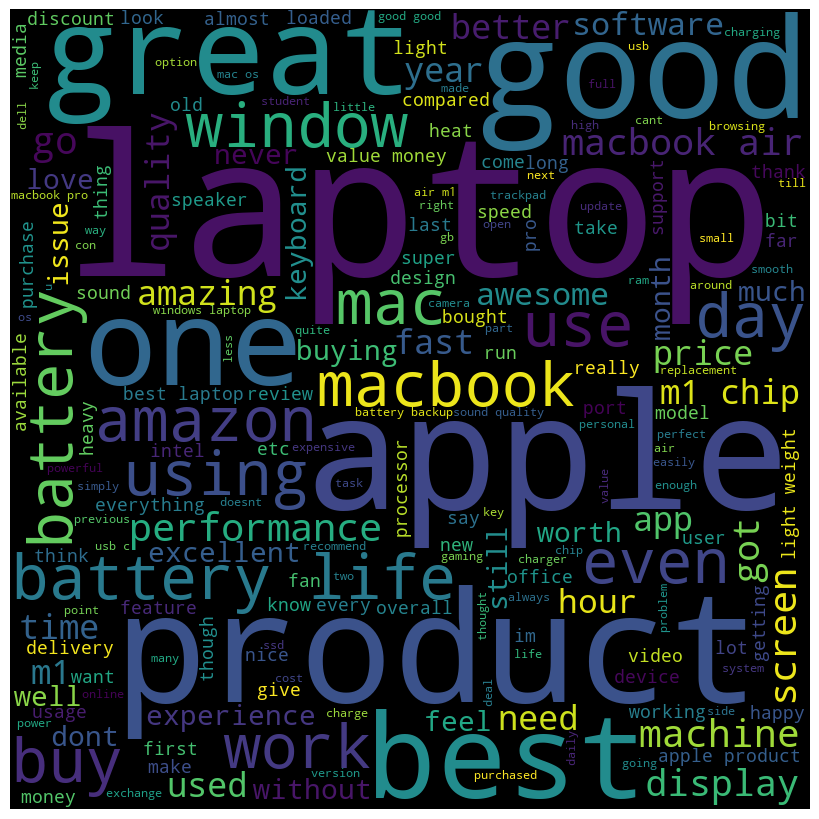

In [34]:
# create the word cloud
wordcloud_pos = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(positive_w)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_pos)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Creating word cloud for negative reviews

In [35]:
negative=review[review['Sentiment']=='Negative']
negative

,Content,Sentiment
5,don’t understand why many applications get han...,Negative
19,quality is getting low day by day. pretty wort...,Negative
31,camera quality not good,Negative
43,hinge issues... sometimes don't open by single...,Negative
62,"box received unsealed, charging adapter and ch...",Negative
...,...,...
662,"don't buy from this seller , i received a defe...",Negative
670,i bought this mac for my exam preparations tho...,Negative
688,all though it is value for money.it`s way too ...,Negative
698,the macbook while being all that is advertised...,Negative


In [36]:
# Joining the list into one string/text
negative_j=''.join(negative['Content'])

In [37]:
# Removing Punctuation
negative_nop=negative_j.translate(str.maketrans('','',string.punctuation))

In [38]:
# Tokanization
negative_token=word_tokenize(negative_nop)

In [39]:
# Removing stopwords
negative_nosw=[word for word in negative_token if not word in stop]

In [40]:
df_neg=pd.DataFrame({'rev':negative_nosw})
df_neg

,rev
0,’
1,understand
2,many
3,applications
4,get
...,...
1562,premium
1563,device
1564,like
1565,macbookitem


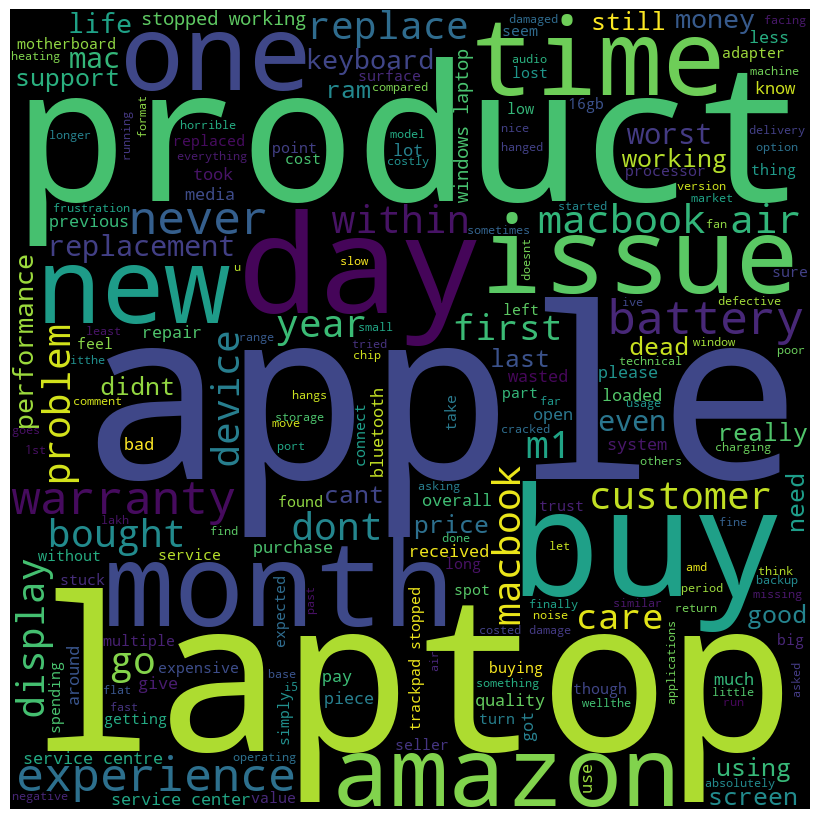

In [41]:
# concatenate the preprocessed text into a single string
negative_w=' '.join(df_neg['rev'])

# create the word cloud
wordcloud_neg = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(negative_w)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_neg)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

### Creating word cloud for positive reviews

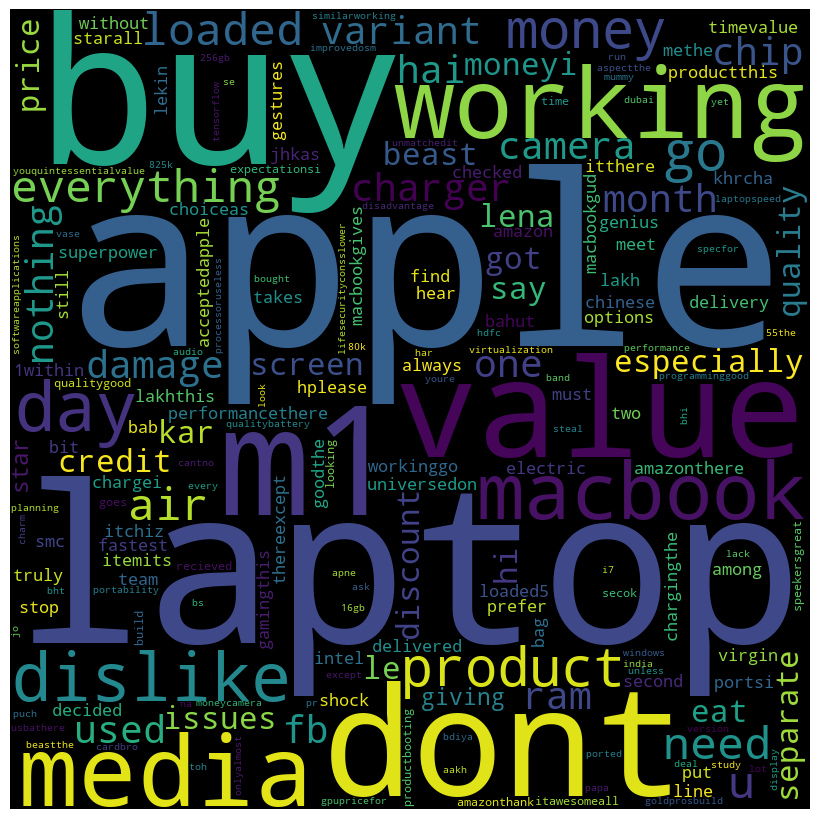

In [42]:
neutral=review[review['Sentiment']=='Neutral']
neutral

# Joining the list into one string/text
neutral_j=''.join(neutral['Content'])

# Removing Punctuation
neutral_nop=neutral_j.translate(str.maketrans('','',string.punctuation))

# Tokanization
neutral_token=word_tokenize(neutral_nop)

# Removing stopwords
neutral_nosw=[word for word in neutral_token if not word in stop]

df_neu=pd.DataFrame({'rev':neutral_nosw})
df_neu

# concatenate the preprocessed text into a single string
neutral_w=' '.join(df_neu['rev'])

# create the word cloud
wordcloud_neu = WordCloud(width=800, height=800, background_color='black', min_font_size=10).generate(neutral_w)

# plot the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud_neu)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Balancing the data set

In [43]:
review

,Content,Sentiment
0,most value for money laptop right now ... amaz...,Positive
1,the best laptop for office and professional w...,Positive
2,looks and worked great for the 1st year. but j...,Positive
4,nice,Positive
5,don’t understand why many applications get han...,Negative
...,...,...
751,excellent machine . only ram is of ddr3 type....,Positive
752,m1 has the fastest cpu have ever made.the long...,Positive
753,if we could get it for around 70-75k with some...,Positive
754,really awesome and it has a 4k display which w...,Positive


In [44]:
counts=review['Sentiment'].value_counts()
counts

Positive    577
Negative     70
Neutral      66
Name: Sentiment, dtype: int64

Here we have, 
Positive reviews = 577, 
Negative reviews = 70, 
Neutral reviews = 66 in numbers. 

For a better result for sentiment analysis we need to balance the data.

In [45]:
!pip install imblearn

     -------------------------------------- 235.6/235.6 kB 3.6 MB/s eta 0:00:00
     -------------------------------------- 302.0/302.0 kB 9.4 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [46]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [47]:
for feature in review.columns: 
    if review['Content'].dtype == 'object': 
        review['Content'] = pd.Categorical(review['Content']).codes

In [48]:
# Separate the features and labels
x = review['Content']
y = review['Sentiment']

In [49]:
x

0      444
1      553
2      413
4      455
5      156
      ... 
751    181
752    434
753    357
754    512
755    186
Name: Content, Length: 713, dtype: int16

In [50]:
# Print the class distribution before applying SMOTE
print('Class distribution before SMOTE:', Counter(y))

Class distribution before SMOTE: Counter({'Positive': 577, 'Negative': 70, 'Neutral': 66})


In [51]:
# Apply SMOTE to balance the dataset
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(x.values.reshape(-1,1), y)

In [52]:
X_res

array([[444],
       [553],
       [413],
       ...,
       [472],
       [646],
       [ 70]], dtype=int16)

In [53]:
print("After balancing: ", Counter(y_res))

After balancing:  Counter({'Positive': 577, 'Negative': 577, 'Neutral': 577})


In [54]:
# Convert the balanced data to a pandas DataFrame
df_balanced = pd.DataFrame({"review_text": X_res.reshape(-1), "sentiment": y_res})

In [55]:
df_balanced.head()

,review_text,sentiment
0,444,Positive
1,553,Positive
2,413,Positive
3,455,Positive
4,156,Negative


In [56]:
df_balanced.sentiment[df_balanced.sentiment =='Neutral'] =0
df_balanced.sentiment[df_balanced.sentiment =='Positive'] =1
df_balanced.sentiment[df_balanced.sentiment =='Negative'] =2

In [57]:
df_balanced

,review_text,sentiment
0,444,1
1,553,1
2,413,1
3,455,1
4,156,2
...,...,...
1726,607,0
1727,333,0
1728,472,0
1729,646,0


In [58]:
X = df_balanced[['review_text']]
Y = df_balanced['sentiment'].astype('int')

## Model Building

**We divided data into train and test set**

In [59]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.30,random_state=0)

### Random Forest Classifier Model

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
model1 = RandomForestClassifier(n_estimators=200, random_state=0)

In [62]:
model1.fit(xtrain,  ytrain)

RandomForestClassifier(n_estimators=200, random_state=0)

In [63]:
predictions1 = model1.predict(xtest)

In [64]:
predictions1

array([1, 0, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 2, 0, 0, 0, 2, 0, 1, 1,
       2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 2, 1, 1,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 2, 2, 0,
       1, 0, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 0, 0, 1, 1, 2, 0, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 1, 2, 1, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 2, 1, 0, 2, 0, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 0, 1, 1, 1, 2,
       0, 1, 0, 2, 2, 1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 0, 2, 1,
       1, 2, 2, 0, 2, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 1, 0, 0, 1, 2, 2,
       0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2,

In [65]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ytest,predictions1))
print(classification_report(ytest,predictions1))
print(accuracy_score(ytest, predictions1))

[[94 39 45]
 [49 68 56]
 [43 36 90]]
              precision    recall  f1-score   support

           0       0.51      0.53      0.52       178
           1       0.48      0.39      0.43       173
           2       0.47      0.53      0.50       169

    accuracy                           0.48       520
   macro avg       0.48      0.48      0.48       520
weighted avg       0.48      0.48      0.48       520

0.4846153846153846


### KNeighbours Classifier

In [66]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors =6)#no of neighbors is hpyer parameter
model2.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=6)

In [67]:
predictions2 = model2.predict(xtest)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ytest,predictions2))
print(classification_report(ytest,predictions2))
print(accuracy_score(ytest, predictions2))

[[126  25  27]
 [ 51  88  34]
 [ 62  36  71]]
              precision    recall  f1-score   support

           0       0.53      0.71      0.60       178
           1       0.59      0.51      0.55       173
           2       0.54      0.42      0.47       169

    accuracy                           0.55       520
   macro avg       0.55      0.55      0.54       520
weighted avg       0.55      0.55      0.54       520

0.5480769230769231


### Logistic Regression

In [69]:
from sklearn.linear_model import LogisticRegression
model3 =LogisticRegression()

In [70]:
model3.fit(xtrain, ytrain)

LogisticRegression()

In [71]:
predictions3 = model3.predict(xtest)

In [72]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ytest,predictions3))
print(classification_report(ytest,predictions3))
print(accuracy_score(ytest, predictions3))

[[ 0 91 87]
 [ 0 77 96]
 [ 0 80 89]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       178
           1       0.31      0.45      0.37       173
           2       0.33      0.53      0.40       169

    accuracy                           0.32       520
   macro avg       0.21      0.32      0.26       520
weighted avg       0.21      0.32      0.25       520

0.3192307692307692


### DecisionTreeClassifier

In [73]:
from sklearn.tree import DecisionTreeClassifier
model4= DecisionTreeClassifier(criterion="gini")
model4.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [74]:
predictions4 = model4.predict(xtest)

In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(ytest,predictions4))
print(classification_report(ytest,predictions4))
print(accuracy_score(ytest, predictions4))

[[115  32  31]
 [ 62  67  44]
 [ 64  38  67]]
              precision    recall  f1-score   support

           0       0.48      0.65      0.55       178
           1       0.49      0.39      0.43       173
           2       0.47      0.40      0.43       169

    accuracy                           0.48       520
   macro avg       0.48      0.48      0.47       520
weighted avg       0.48      0.48      0.47       520

0.47884615384615387


### Model Comparison

In [76]:
accuracy=pd.DataFrame()

In [77]:
accuracy['Model']=('Random Forest','KNeighbour','Logistic Regreassion','Decision Tree')
accuracy['Accuracy_Score']=(accuracy_score(ytest, predictions1),accuracy_score(ytest, predictions2),
                           accuracy_score(ytest, predictions3),accuracy_score(ytest, predictions4))
accuracy

,Model,Accuracy_Score
0,Random Forest,0.484615
1,KNeighbour,0.548077
2,Logistic Regreassion,0.319231
3,Decision Tree,0.478846


We have KNeighbour Model with graeter accuracy than Random Forest, Logistic Regression, Decision Tree models.

So, we are fixing the KNeighbour model as our final model.

### Predictions

In [86]:
new_reviews=pd.DataFrame()
new_reviews['review'] = (input("Type review :"),)
new_reviews['sentiment']= new_reviews['review'].apply(get_sentiment_label)
new_reviews

Type review :okay


,review,sentiment
0,okay,Positive


In [88]:
for feature in review.columns: 
    if new_reviews['review'].dtype == 'object': 
        new_reviews['review'] = pd.Categorical(new_reviews['review']).codes

In [89]:
new_reviews.sentiment[new_reviews.sentiment =='Neutral'] =0
new_reviews.sentiment[new_reviews.sentiment =='Positive'] =1
new_reviews.sentiment[new_reviews.sentiment =='Negative'] =2

In [90]:
new_reviews["sentiment"]

0    1
Name: sentiment, dtype: object

In [91]:
l=new_reviews['review']

In [92]:
n=np.array(l)
nnn=n.reshape(-1,1)

In [93]:
finalprediction = model2.predict(nnn)
if finalprediction == 0:
    print("Review Sentiment is: ",'Neutral 😐')
elif finalprediction == 1:
    print("Review Sentiment is: ",'Positive 😃')
elif finalprediction == 2:
    print("Review Sentiment is: ",'Negative 😕')

Review Sentiment is:  Neutral 😐
